In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

CNN model

In [2]:
def create_cnn(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    intermediate_layer_model = models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:]]) # albo do -1
    
    return model, intermediate_layer_model


train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary',
    classes=['REAL', 'FAKE']
)

test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary',
    classes=['REAL', 'FAKE']
)

input_shape = (32, 32, 3)
model = create_cnn(input_shape)

model[0].compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model[0].fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32,
                    epochs=1,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // 32)

test_loss, test_acc = model[0].evaluate(test_generator)
print('Test accuracy:', test_acc)


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
625/625 [==============================] - 13s 21ms/step - loss: 0.1957 - accuracy: 0.9231
Test accuracy: 0.9230999946594238


In [3]:
model[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

Testing image

In [12]:
def test_image(img_path, intermediate_model):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    img_array = img_array / 255.0

    intermediate_outputs = intermediate_model.predict(img_array)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    for _, output in enumerate(intermediate_outputs):
        if len(output.shape) == 4:  
            plt.figure(figsize=(10, 10))
            for j in range(output.shape[-1]):
                plt.subplot(1, output.shape[-1], j + 1)
                plt.imshow(output[0, :, :, j], cmap='viridis')
                plt.axis('off')
            plt.show()
            print(output.shape[-1])

    prediction = intermediate_outputs[-1]

    if prediction[0][0] > 0.5:
        print("The image is classified as FAKE.")
    else:
        print("The image is classified as REAL.")
        
    plt.figure(figsize=(0.5, 0.5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 24ms/step


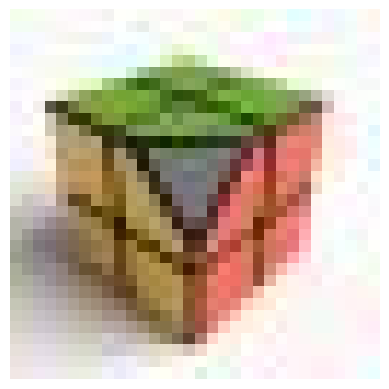

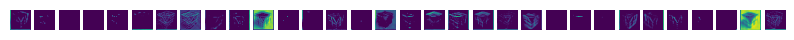

32


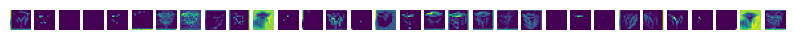

32


64


64


128


128


128


128
The image is classified as REAL.


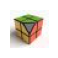

In [13]:
test_image('manual_test_data/cube_real.jpg', model[1])

1/1 [==============================] - 0s 17ms/step


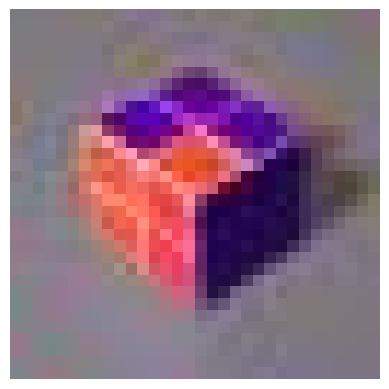

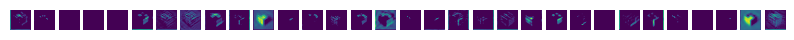

32


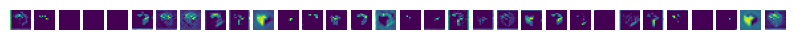

32


64


64


128


128


128


128
The image is classified as FAKE.


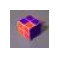

In [15]:
test_image('manual_test_data/cube_fake.jpg', model[1])

1/1 [==============================] - 0s 16ms/step


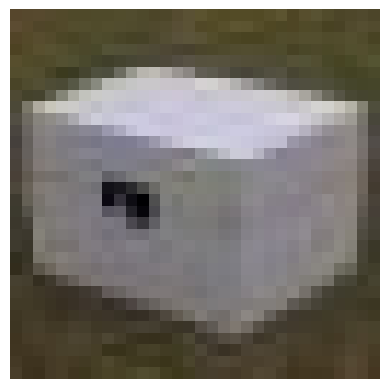

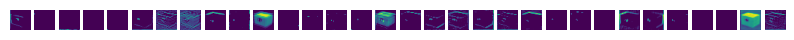

32


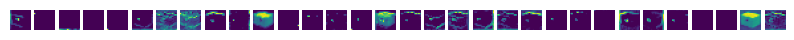

32


64


64


128


128


128


128
The image is classified as REAL.


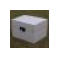

In [28]:
test_image('manual_test_data/box_fake.jpg', model[1])

1/1 [==============================] - 0s 29ms/step


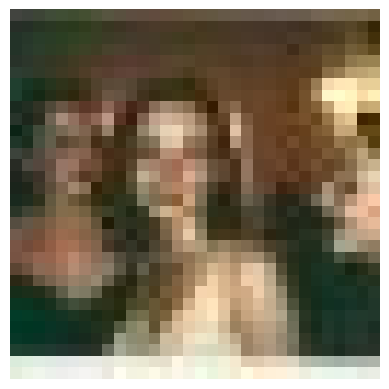

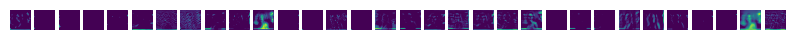

32


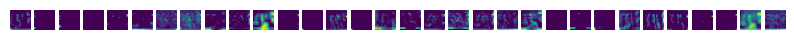

32


64


64


128


128


128


128
The image is classified as REAL.


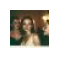

In [16]:
test_image('manual_test_data/people_fake.jpg', model[1])

1/1 [==============================] - 0s 29ms/step


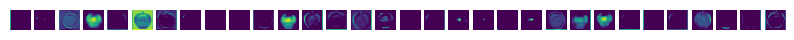

32


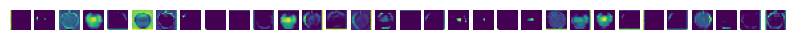

32


64


64


128


128


128


128
The image is classified as REAL.


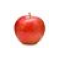

In [24]:
test_image('manual_test_data/jablko2_real.jpg', model[1])

1/1 [==============================] - 0s 17ms/step


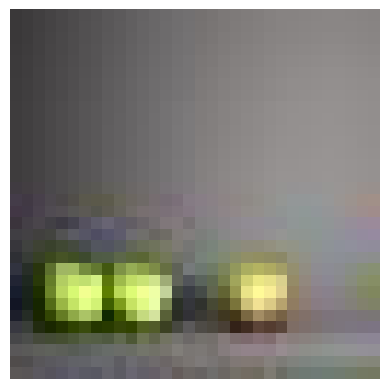

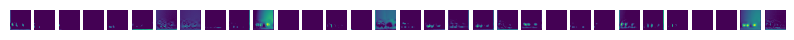

32


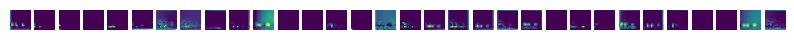

32


64


64


128


128


128


128
The image is classified as FAKE.


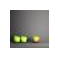

In [18]:
test_image('manual_test_data/jablko2_fake.jpg', model[1])

1/1 [==============================] - 0s 106ms/step


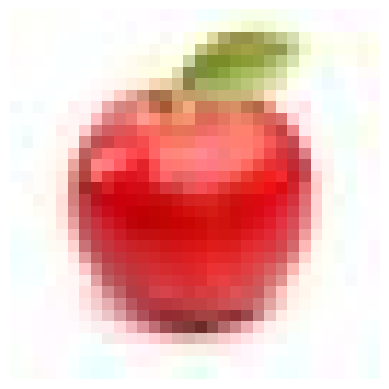

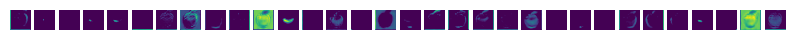

32


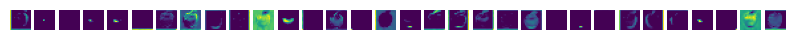

32


64


64


128


128


128


128
The image is classified as REAL.


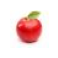

In [19]:
test_image('manual_test_data/jablko_real.jpg', model[1])

1/1 [==============================] - 0s 63ms/step


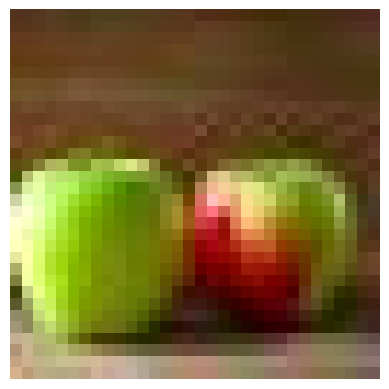

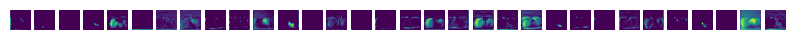

32


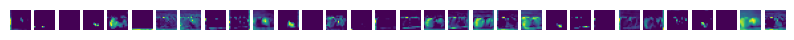

32


64


64


128


128


128


128
The image is classified as FAKE.


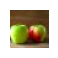

In [21]:
test_image('manual_test_data/jablko_fake.jpg', model[1])

1/1 [==============================] - 0s 83ms/step


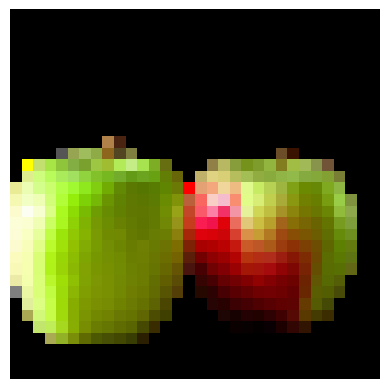

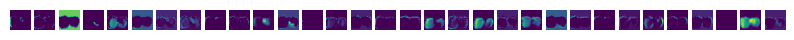

32


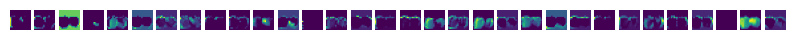

32


64


64


128


128


128


128
The image is classified as FAKE.


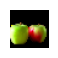

In [22]:
test_image('manual_test_data/jablko_fake_bez_tla.png', model[1])

1/1 [==============================] - 0s 29ms/step


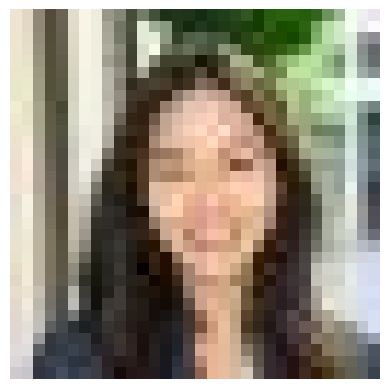

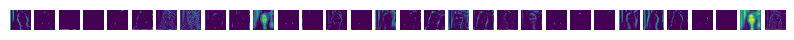

32


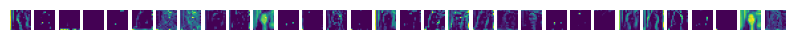

32


64


64


128


128


128


128
The image is classified as REAL.


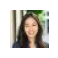

In [23]:
test_image('manual_test_data/human_fake.jpg', model[1])

1/1 [==============================] - 0s 23ms/step


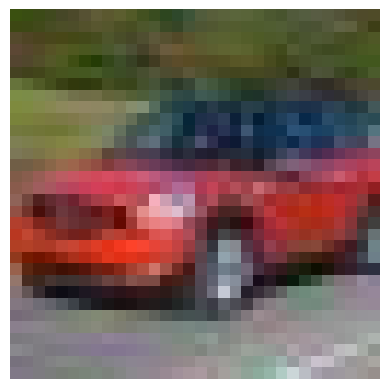

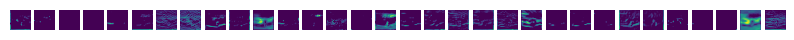

32


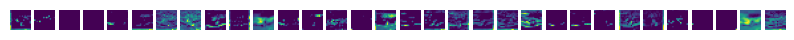

32


64


64


128


128


128


128
The image is classified as REAL.


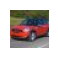

In [24]:
test_image('manual_test_data/car_real.jpg', model[1])

1/1 [==============================] - 0s 25ms/step


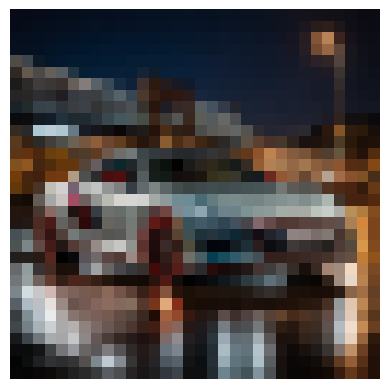

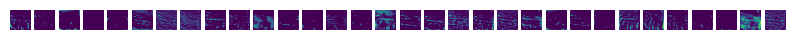

32


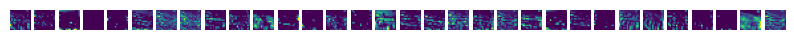

32


64


64


128


128


128


128
The image is classified as FAKE.


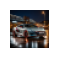

In [25]:
test_image('manual_test_data/car_fake2.png', model[1])

1/1 [==============================] - 0s 40ms/step


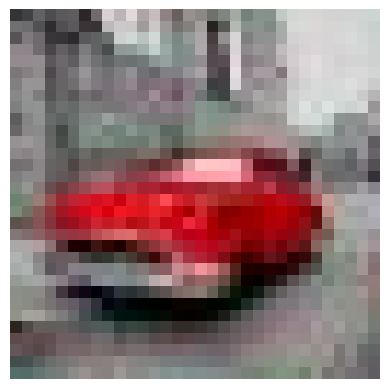

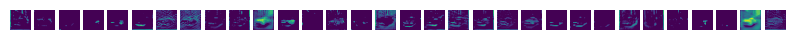

32


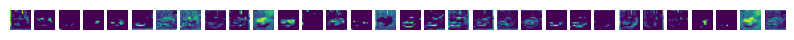

32


64


64


128


128


128


128
The image is classified as FAKE.


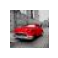

In [26]:
test_image('manual_test_data/car_fake.jpg', model[1])

1/1 [==============================] - 0s 28ms/step


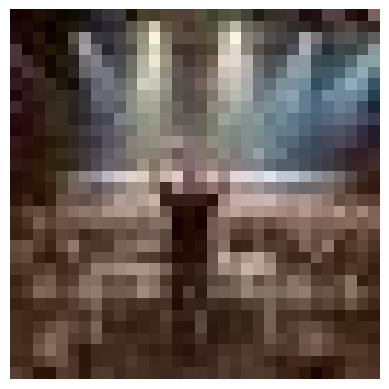

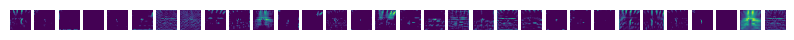

32


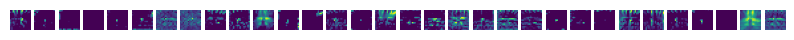

32


64


64


128


128


128


128
The image is classified as FAKE.


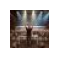

In [27]:
test_image('manual_test_data/studio_real.jpg', model[1])